<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter4/Data_Preprocessing_2_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 이상치 확인
wine 데이터세트의 'color_intensity' 컬럼에서 IQR방식으로 이상치를 탐색해보자

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:"class_0", 1 : "class_1", 2 : "class_2"})

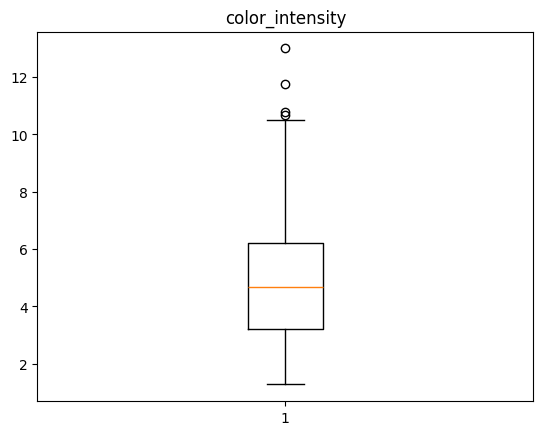

In [37]:
plt.boxplot(wine['color_intensity'], whis = 1.5)
plt.title('color_intensity')
plt.show()

In [38]:
# 이상치를 가져오는 함수로 만들어 이상치의 위치와 값을 확인해보자
import numpy as np
def outliers_iqr(dt, col):
  q1, q3 = np.percentile(dt[col], [25,75])
  iqr = q3-q1
  lower_whis = q1 - (iqr * 1.5)
  upper_whis = q3 + (iqr * 1.5)
  outliers = dt[ (dt[col] > upper_whis) | (dt[col] < lower_whis)]
  return outliers[col]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


# 3. 이상치 정제

## 3-1. 이상치 제거

In [39]:
drop_outliers = wine.drop(index = outliers.index)

# 이상치를 삭제하기 전과 후의 데이터 shape
print("original : ", wine.shape)
print("Drop outliers : ", drop_outliers.shape)

original :  (178, 14)
Drop outliers :  (174, 14)


## 3-2. 이상치 대체

In [42]:
print(wine.loc[outliers.index,'color_intensity'])
wine.loc[outliers.index, 'color_intensity'] = np.NaN
print(wine.loc[outliers.index,'color_intensity'])
print("wine['color_intensity].mean : ", wine['color_intensity'].mean())

print(wine.loc[wine['color_intensity'].isna()])
wine['color_intensity'] = wine['color_intensity'].fillna( wine['color_intensity'].mean() )
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64
151   NaN
158   NaN
159   NaN
166   NaN
Name: color_intensity, dtype: float64
wine['color_intensity].mean :  4.908678155172414
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
151    12.79        2.67  2.48               22.0      112.0           1.48   
158    14.34        1.68  2.70               25.0       98.0           2.80   
159    13.48        1.67  2.64               22.5       89.0           2.60   
166    13.45        3.70  2.60               23.0      111.0           1.70   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
151        1.36                  0.24             1.26              NaN  0.48   
158        1.31                  0.53             2.70              NaN  0.57   
159        1.10                  0.52             2.29              NaN  0.57   
166        0.92                  0.43             1

,color_intensity
151,4.908678
158,4.908678
159,4.908678
166,4.908678
